<a href="https://colab.research.google.com/github/lluisdn/TFM/blob/First-tests/ImageNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Input, Conv2D, MaxPooling2D, Dense, Flatten
from keras.models import Model
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
!pip install opendatasets
import opendatasets as od
from PIL import Image

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
tiny_dataset = od.download(
  "https://www.kaggle.com/datasets/ambityga/imagenet100/")
#Kaggle username: lluisdeixt
#db453a9d6869f9718342176223352e8a


Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: lluisdeixt
Your Kaggle Key: ··········


100%|██████████| 16.1G/16.1G [01:52<00:00, 154MB/s] 


In [ ]:
 !wget https://s3-us-west-2.amazonaws.com/imagenetv2public/imagenetv2-matched-frequency.tar.gz

--2023-02-22 18:28:49--  https://s3-us-west-2.amazonaws.com/imagenetv2public/imagenetv2-matched-frequency.tar.gz
Resolving s3-us-west-2.amazonaws.com (s3-us-west-2.amazonaws.com)... 52.92.194.232, 52.218.241.56, 52.218.238.48, ...
Connecting to s3-us-west-2.amazonaws.com (s3-us-west-2.amazonaws.com)|52.92.194.232|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1264079360 (1.2G) [application/x-tar]
Saving to: ‘imagenetv2-matched-frequency.tar.gz’

imagenetv2-matched- 100%[===================>]   1.18G  30.8MB/s    in 53s     

2023-02-22 18:29:42 (22.7 MB/s) - ‘imagenetv2-matched-frequency.tar.gz’ saved [1264079360/1264079360]



In [ ]:
!tar -xf imagenetv2-matched-frequency.tar.gz

In [ ]:
ls

imagenet100/                              imagenetv2-matched-frequency.tar.gz
imagenetv2-matched-frequency-format-val/  sample_data/


In [ ]:
cd imagenetv2-matched-frequency-format-val


SyntaxError: ignored

In [ ]:
ls

0/    168/  237/  306/  376/  445/  514/  584/  653/  722/  792/  861/  930/
1/    169/  238/  307/  377/  446/  515/  585/  654/  723/  793/  862/  931/
10/   17/   239/  308/  378/  447/  516/  586/  655/  724/  794/  863/  932/
100/  170/  24/   309/  379/  448/  517/  587/  656/  725/  795/  864/  933/
101/  171/  240/  31/   38/   449/  518/  588/  657/  726/  796/  865/  934/
102/  172/  241/  310/  380/  45/   519/  589/  658/  727/  797/  866/  935/
103/  173/  242/  311/  381/  450/  52/   59/   659/  728/  798/  867/  936/
104/  174/  243/  312/  382/  451/  520/  590/  66/   729/  799/  868/  937/
105/  175/  244/  313/  383/  452/  521/  591/  660/  73/   8/    869/  938/
106/  176/  245/  314/  384/  453/  522/  592/  661/  730/  80/   87/   939/
107/  177/  246/  315/  385/  454/  523/  593/  662/  731/  800/  870/  94/
108/  178/  247/  316/  386/  455/  524/  594/  663/  732/  801/  871/  940/
109/  179/  248/  317/  387/  456/  525/  595/  664/  733/  802/  872/  941/


In [ ]:
!nvidia-smi

Wed Feb 22 18:30:48 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 510.47.03    Driver Version: 510.47.03    CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   62C    P0    25W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
cd ..

/content


In [ ]:
from torchvision import datasets
data = datasets.ImageFolder(root='imagenetv2-matched-frequency-format-val')

In [ ]:
import torch
dataset_loader = torch.utils.data.DataLoader(data,
                                             batch_size=4, shuffle=True)

In [ ]:
for x in dataset_loader:
  break
dataset_loader

TypeError: ignored

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
train_data_dir = 'imagenetv2-matched-frequency-format-val/'
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical')


Found 10000 images belonging to 1000 classes.


In [ ]:
import torch
import numpy as np
from torchvision import datasets, transforms

# Define the dataset and data transformation
data_transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor()
])

dataset = datasets.ImageFolder(root='imagenetv2-matched-frequency-format-val', transform=data_transform)

# Create a data loader for the dataset
data_loader = torch.utils.data.DataLoader(dataset, batch_size=len(dataset))

# Get the data and labels from the data loader

#data, labels = next(iter(data_loader))

# Convert the data tensor to a NumPy array
#data_np = data.numpy()

# Convert the labels tensor to a NumPy array
#labels_np = labels.numpy()

In [ ]:
for i in data_loader:
  break

In [ ]:
print(i)

NameError: ignored

In [ ]:
pip install tensorflow-datasets


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import tensorflow_datasets as tfds

In [ ]:
builder = tfds.ImageFolder('imagenetv2-matched-frequency-format-val')

In [ ]:
print(builder.info)
ds = builder.as_dataset(shuffle_files=True)
tfds.show_examples(ds, builder.info)

tfds.core.DatasetInfo(
    name='image_folder',
    full_name='image_folder/1.0.0',
    description="""
    Generic image classification dataset.
    """,
    homepage='https://www.tensorflow.org/datasets/catalog/image_folder',
    data_path='/root/tensorflow_datasets/image_folder/1.0.0',
    file_format=tfrecord,
    download_size=Unknown size,
    dataset_size=Unknown size,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=uint8),
        'image/filename': Text(shape=(), dtype=string),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=0),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
    },
    citation="""""",
)


TypeError: ignored

In [ ]:
import os
import urllib.request
import tarfile

# specify the subset of ImageNet test to download
urls = ['http://www.image-net.org/data/ILSVRC/2012/clsloc-val-50.tar.gz',
        'http://www.image-net.org/data/ILSVRC/2012/clsloc-val-100.tar.gz',
        'http://www.image-net.org/data/ILSVRC/2012/clsloc-val-500.tar.gz']

# create a directory to store the downloaded files
if not os.path.exists('imagenet_subset'):
    os.makedirs('imagenet_subset')

# download and extract the subset of ImageNet test
for url in urls:
    filename = url.split('/')[-1]
    filepath = os.path.join('imagenet_subset', filename)
    if not os.path.exists(filepath):
        print(f'Downloading {filename}...')
        urllib.request.urlretrieve(url, filepath)
    print(f'Extracting {filename}...')
    tarfile.open(filepath, 'r:gz').extractall('imagenet_subset')


HTTPError: ignored

# **AlexNet**

Comparison_image_neural_networks (1).svg

In [ ]:
# Input layer
input_data = Input(shape=(224, 224, 3))

# First Convolutional layer
x = Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), padding='same', activation='relu')(input_data)
x = MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='same')(x)

# Second Convolutional layer
x = Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), padding='same', activation='relu')(x)
x = MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='same')(x)

# Third Convolutional layer
x = Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu')(x)

# Fourth Convolutional layer
x = Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu')(x)

# Fifth Convolutional layer
x = Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu')(x)
x = MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='same')(x)

# Flatten the data and feed it into the fully connected layers
x = Flatten()(x)
x = Dense(4096, activation='relu')(x)
x = Dense(4096, activation='relu')(x)
x = Dense(1000, activation='softmax')(x)

model = keras.Model(input_data, x)

# Compile the model
alexnet = Model(inputs=input_data, outputs=x)
alexnet.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#Plot the model
alexnet.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 56, 56, 96)        34944     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 28, 28, 96)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 256)       614656    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 256)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 384)       8851

# **Pre-Trained Networks**


In [ ]:
import os
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications import imagenet_utils
from IPython.display import Image


img_path1='/content/imagenet100/train.X1/n01818515/n01818515_43525.JPEG'

def prediction(img_path, model):
  img = image.load_img(img_path, target_size=(224, 224))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  x = preprocess_input(x)
  preds = model.predict(x, verbose=0)
  most_prob = decode_predictions(preds)[0][0][1]
  return preds, most_prob

#*JSON file*

In [ ]:
import json
with open('/content/imagenet100/Labels.json', 'r') as f:
    labels = json.load(f)


def img_label(img_path):
  end=img_path.find('_')
  ini=img_path.find('/n', end-12)
  folder=img_path[ini+1:end:1]
  return labels[folder]


FileNotFoundError: ignored

# *ResNet*

102967424/102967424 [==============================] - 1s 0us/step
label : macaw
most probability : paintbrush


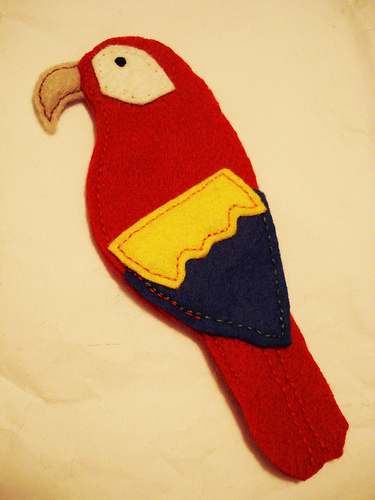

In [ ]:
#Model: ResNet50
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

ResNet50 = ResNet50(weights = 'imagenet')
preds_ResNet50, most_prob_ResNet50 = prediction(img_path1, ResNet50)


label = img_label(img_path1)
print('label :', label)
print('most probability :', most_prob_ResNet50)



def predictions(img_path):
  img = image.load_img(img_path, target_size=(224, 224))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  x = preprocess_input(x)
  preds = ResNet50.predict(x, verbose=0)
  return decode_predictions(preds, top=1)[0][0][0]

Image(filename = img_path1, width = 300, height = 200)


In [ ]:
root_folder = '/content/imagenet100'
correct=0
wrong=0
wrongs=[]
for folder_name in os.listdir(root_folder):
    folder_path = os.path.join(root_folder, folder_name)
    if folder_path != "/content/imagenet100/Labels.json" and folder_path == "/content/imagenet100/train.X1":
      files=[]
      for folder_folder_name in os.listdir(folder_path):
        files.append(folder_folder_name)
        for picture in os.listdir(root_folder+ "/" +folder_name+ "/" +folder_folder_name):
          if correct<2:
            adress=root_folder+ "/"+ folder_name + "/"+ folder_folder_name+ "/" + picture
            predicted=predictions(adress)
            if predicted == folder_folder_name:
              correct=correct+1
            else:
              wrong=wrong+1
              wrongs.append(adress)
          else:
            break
      print('correct= ',correct)
      print('worng= ', wrong)
      print(wrongs)





correct=  2
worng=  0
[]


#*VGG16*

553467096/553467096 [==============================] - 18s 0us/step
label : macaw
most probability : Christmas_stocking


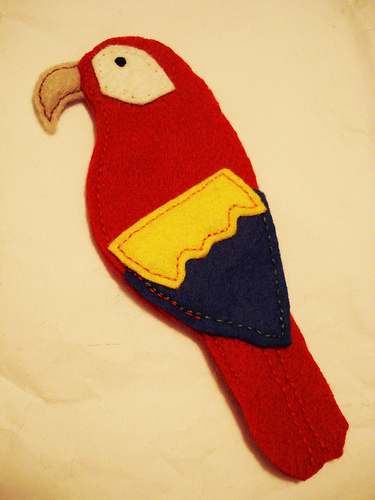

In [ ]:
#Model: VGG16
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input,decode_predictions

VGG16 = VGG16(weights = 'imagenet')
preds_VGG16, most_prob_VGG16 = prediction(img_path1, VGG16)

label = img_label(img_path1)
print('label :', label)
print('most probability :', most_prob_VGG16)

Image(filename = img_path1, width = 300, height = 200)


In [ ]:
img_path = '/content/imagenet100/train.X1/n01818515/n01818515_43525.JPEG'
#'/content/imagenet100/train.X1/n01695060/n01695060_10028.JPEG'
#'/content/imagenet100/train.X1/n01440764/n01440764_10124.JPEG'
#'/content/imagenet100/train.X1/n01440764/n01440764_10048.JPEG'


# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
print('Predicted:', decode_predictions(preds_VGG16, top=5)[0])
#print(decode_predictions(preds, top=1)[0][0][0])


Predicted: [('n03026506', 'Christmas_stocking', 0.5296094), ('n02834397', 'bib', 0.055706825), ('n03775071', 'mitten', 0.053126685), ('n04229816', 'ski_mask', 0.039453186), ('n02869837', 'bonnet', 0.035112917)]


# *MobileNet*

In [ ]:
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.applications.mobilenet import preprocess_input, decode_predictions
#MobileNet = tf.keras.applications.MobileNet()
MobileNet = MobileNet(weights = 'imagenet')

17225924/17225924 [==============================] - 0s 0us/step


In [ ]:
def prepare_image(img_path):
    img = image.load_img(img_path , target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array_expanded_dims = np.expand_dims(img_array, axis=0)
    return tf.keras.applications.mobilenet.preprocess_input(img_array_expanded_dims)

def plot(img_path):
  return Image(filename=img_path, width=300,height=200)

def MobileNet_prediction(img_path):
  preprocessed_image = prepare_image(img_path)
  predictions = model.predict(preprocessed_image)
  results = imagenet_utils.decode_predictions(predictions)
  print(results)
  return Image(filename=img_path, width=300,height=200)

1/1 [==============================] - 0s 240ms/step
[[('n04065272', 'recreational_vehicle', 0.0010973656), ('n03376595', 'folding_chair', 0.0010940061), ('n02092002', 'Scottish_deerhound', 0.0010877248), ('n02277742', 'ringlet', 0.0010872819), ('n03482405', 'hamper', 0.0010868296)]]


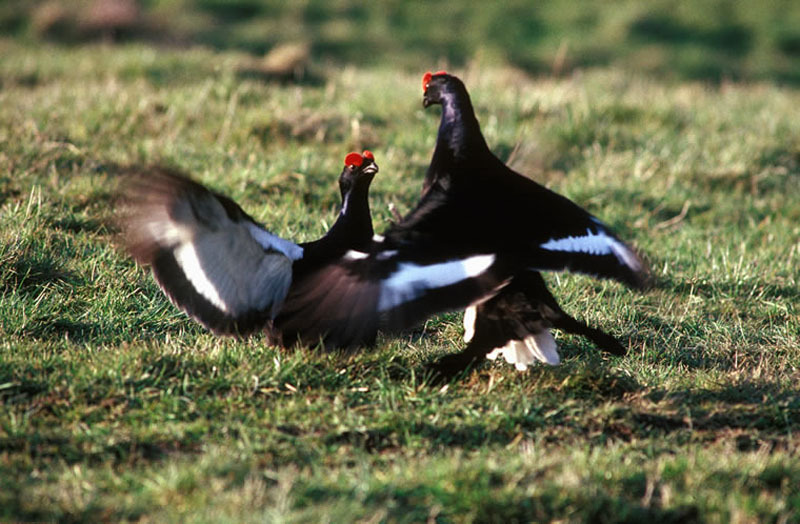

In [ ]:
img_label('/content/imagenet100/train.X1/n01795545/n01795545_10021.JPEG')
MobileNet_prediction('/content/imagenet100/train.X1/n01795545/n01795545_10021.JPEG')


1/1 [==============================] - 0s 86ms/step
[[('n03208938', 'disk_brake', 0.001049071), ('n04065272', 'recreational_vehicle', 0.00104541), ('n04111531', 'rotisserie', 0.0010431126), ('n02093859', 'Kerry_blue_terrier', 0.0010425226), ('n02443114', 'polecat', 0.00104199)]]


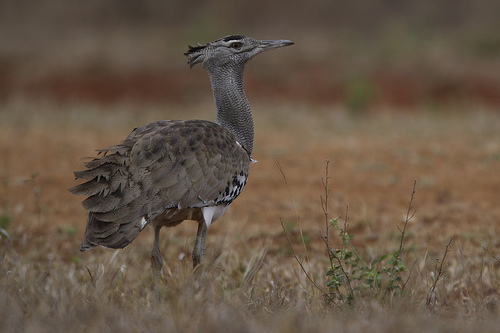

In [ ]:
img_label('/content/imagenet100/train.X1/n02018795/n02018795_100.JPEG')
MobileNet_prediction('/content/imagenet100/train.X1/n02018795/n02018795_100.JPEG')

In [ ]:
preds_MobileNet, most_prob_MobileNet=prediction(img_path1, MobileNet)
label = img_label(img_path1)

print('label :', label)
print('most probability :', most_prob_MobileNet)

label : macaw
most probability : Christmas_stocking


#*ConvNeXtXLarge*

In [ ]:
from keras.applications.convnext import ConvNeXtBase
from tensorflow.keras.applications.convnext import preprocess_input, decode_predictions
ConvNeXtBase = ConvNeXtBase(weights = 'imagenet')

ConvNeXtBase.summary()


Model: "convnext_base"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 convnext_base_prestem_normaliz  (None, 224, 224, 3)  0          ['input_6[0][0]']                
 ation (Normalization)                                                                            
                                                                                                  
 convnext_base_stem (Sequential  (None, 56, 56, 128)  6528       ['convnext_base_prestem_normaliza
 )                                                               tion[0][0]']         

In [ ]:
preds_ConvNeXtBase, most_prob_ConvNeXtBase=prediction(img_path1, ConvNeXtBase)

#label = img_label(img_path1)

#print('label :', label)
#print('most probability :', most_prob_ConvNeXtBase)

#print(tf.keras.activations.softmax(preds_ConvNeXtBase, axis=-1))

AttributeError: ignored

In [ ]:
preds_ConvNeXtBase.shape
import scipy
scipy.special.softmax(preds_ConvNeXtBase).max()

#tf.keras.activations.softmax(preds_ConvNeXtBase, axis=-1)

0.6340676

#*EfficientNetV2*

In [ ]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.applications.efficientnet import preprocess_input, decode_predictions
EfficientNetB0 = EfficientNetB0(weights='imagenet')

21834768/21834768 [==============================] - 0s 0us/step


In [ ]:
preds_EfficientNetB0, most_prob_EfficientNetB0=prediction(img_path1,EfficientNetB0)
label = img_label(img_path1)

print('label :', label)
print('most probability :', most_prob_EfficientNetB0)

label : macaw
most probability : Christmas_stocking


#**Labels JSON**

In [ ]:
import json
with open('/content/imagenet_class_index.json', 'r') as f:
    labels_imagenet = json.load(f)
labels_array=[]

for i in range(1000):
  labels_array.append(labels_imagenet[str(i)][1])

print(labels_array)
print(len(labels_array))
print(labels_array.index('macaw'))
array_preds_conv=[]

for k in range(1000):
  array_preds_conv.append(preds_ConvNeXtBase[0][k])

print(array_preds_conv.index(np.max(array_preds_conv)))


['tench', 'goldfish', 'great_white_shark', 'tiger_shark', 'hammerhead', 'electric_ray', 'stingray', 'cock', 'hen', 'ostrich', 'brambling', 'goldfinch', 'house_finch', 'junco', 'indigo_bunting', 'robin', 'bulbul', 'jay', 'magpie', 'chickadee', 'water_ouzel', 'kite', 'bald_eagle', 'vulture', 'great_grey_owl', 'European_fire_salamander', 'common_newt', 'eft', 'spotted_salamander', 'axolotl', 'bullfrog', 'tree_frog', 'tailed_frog', 'loggerhead', 'leatherback_turtle', 'mud_turtle', 'terrapin', 'box_turtle', 'banded_gecko', 'common_iguana', 'American_chameleon', 'whiptail', 'agama', 'frilled_lizard', 'alligator_lizard', 'Gila_monster', 'green_lizard', 'African_chameleon', 'Komodo_dragon', 'African_crocodile', 'American_alligator', 'triceratops', 'thunder_snake', 'ringneck_snake', 'hognose_snake', 'green_snake', 'king_snake', 'garter_snake', 'water_snake', 'vine_snake', 'night_snake', 'boa_constrictor', 'rock_python', 'Indian_cobra', 'green_mamba', 'sea_snake', 'horned_viper', 'diamondback', 

#**Results for different Networks**

In [ ]:
preds_EfficientNetB0=[]
preds_ConvNeXtXLarge=[]
preds_MobileNet=[]
preds_VGG16=[]
preds_ResNet50=[]

def model_predictions_general(img_path, model, output_v):
  preds, _= prediction(img_path, model)
  for i in range(1000):
    output_v.append(preds[0][i])
  return output_v

from tensorflow.keras.applications.efficientnet import preprocess_input, decode_predictions
preds_EfficientNetB0=model_predictions_general(img_path1,EfficientNetB0,preds_EfficientNetB0)
from tensorflow.keras.applications.mobilenet import preprocess_input, decode_predictions
preds_MobileNet=model_predictions_general(img_path1,MobileNet,preds_MobileNet)
from tensorflow.keras.applications.vgg16 import preprocess_input,decode_predictions
preds_VGG16=model_predictions_general(img_path1,VGG16,preds_VGG16)
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
preds_ResNet50=model_predictions_general(img_path1,ResNet50,preds_ResNet50)



In [ ]:
tf.keras.applications.imagenet_utils.decode_predictions
def prediction(img_path, model):
  img = image.load_img(img_path, target_size=(224, 224))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  x = preprocess_input(x)
  preds = model.predict(x, verbose=0)
  most_prob = decode_predictions(preds)[0][0][1]
  return preds, most_prob

preds_label, _ = prediction(img_path1, MobileNet)

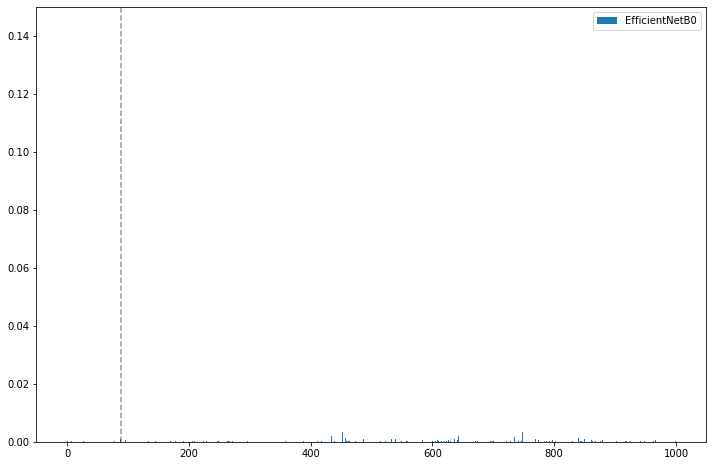

probabilitats totals: 0.99999946 0.9999995 0.99999964 1.0000004


In [ ]:
numbers=np.linspace(0,999,1000)
plt.figure(figsize=(12,8))
plt.bar(numbers,preds_EfficientNetB0, label='EfficientNetB0')
#plt.bar(numbers,preds_ConvNeXtXLarge, label='ConvNeXtBase')
#plt.bar(numbers,preds_MobileNet, label='MobileNet')
#plt.bar(numbers,preds_VGG16, label='VGG16')
#plt.bar(numbers,preds_ResNet50, label='ResNet50')
#plt.xticks(labels_array, numbers)
plt.legend()
plt.ylim(0,0.15)
plt.axvline(labels_array.index('macaw'), color='black', linestyle='--', alpha=0.4)
plt.show()

print('probabilitats totals:', np.max(np.cumsum(preds_MobileNet)), np.max(np.cumsum(preds_VGG16)), np.max(np.cumsum(preds_ResNet50)), np.max(np.cumsum(preds_EfficientNetB0)))


#**Multipredictions**

In [ ]:
def global_predictor(img_path):
  preds_EfficientNetB0=[]
  preds_ConvNeXtXLarge=[]
  preds_MobileNet=[]
  preds_VGG16=[]
  preds_ResNet50=[]
  from tensorflow.keras.applications.efficientnet import preprocess_input, decode_predictions
  preds_EfficientNetB0=model_predictions_general(img_path,EfficientNetB0,preds_EfficientNetB0)
  from tensorflow.keras.applications.mobilenet import preprocess_input, decode_predictions
  preds_MobileNet=model_predictions_general(img_path,MobileNet,preds_MobileNet)
  from tensorflow.keras.applications.vgg16 import preprocess_input,decode_predictions
  preds_VGG16=model_predictions_general(img_path,VGG16,preds_VGG16)
  from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
  preds_ResNet50=model_predictions_general(img_path,ResNet50,preds_ResNet50)
  global_preds=[preds_EfficientNetB0,preds_MobileNet, preds_VGG16, preds_ResNet50]
  label = img_label(img_path)
  numbers=np.linspace(0,999,1000)
  plt.figure(figsize=(12,8))
  plt.axvline(labels_array.index(label), color='black', linestyle='--', alpha=0.4)
  plt.bar(numbers,preds_EfficientNetB0, label='EfficientNetB0')
  plt.bar(numbers,preds_MobileNet, label='MobileNet')
  plt.bar(numbers,preds_VGG16, label='VGG16')
  plt.bar(numbers,preds_ResNet50, label='ResNet50')
  plt.legend()
  plt.ylim(0,0.25)
  plt.title(label)
  plt.show()

  return global_preds, label




#*Iteration over the images*

In [ ]:
"""
i=0
while i<20:
  root_folder = '/content/imagenet100'
  for folder_name in os.listdir(root_folder):
      folder_path = os.path.join(root_folder, folder_name)
      if folder_path != "/content/imagenet100/Labels.json" and folder_path == "/content/imagenet100/train.X1":
        files=[]
        for folder_folder_name in os.listdir(folder_path):
          files.append(folder_folder_name)
          for picture in os.listdir(root_folder+ "/" +folder_name+ "/" +folder_folder_name):
            adress=root_folder+ "/"+ folder_name + "/"+ folder_folder_name+ "/" + picture
            #global_preds, labels=global_predictor(adress)
            i=i+1
            continue

"""



'\ni=0\nwhile i<20:\n  root_folder = \'/content/imagenet100\'\n  for folder_name in os.listdir(root_folder):\n      folder_path = os.path.join(root_folder, folder_name)\n      if folder_path != "/content/imagenet100/Labels.json" and folder_path == "/content/imagenet100/train.X1": \n        files=[]\n        for folder_folder_name in os.listdir(folder_path):\n          files.append(folder_folder_name)\n          for picture in os.listdir(root_folder+ "/" +folder_name+ "/" +folder_folder_name):\n            adress=root_folder+ "/"+ folder_name + "/"+ folder_folder_name+ "/" + picture\n            #global_preds, labels=global_predictor(adress)\n            i=i+1\n            continue\n          \n'

In [ ]:
#print(len(global_preds))

NameError: ignored

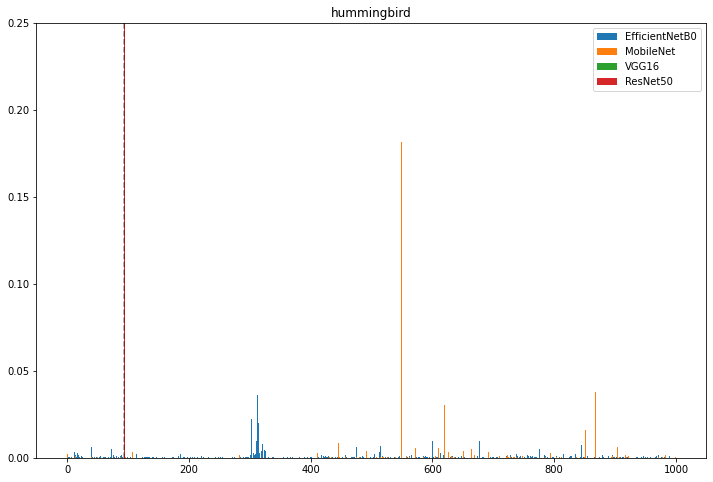

In [ ]:
_, _= global_predictor('/content/imagenet100/train.X1/n01833805/n01833805_10010.JPEG')
img_path_2='/content/imagenet100/train.X1/n01833805/n01833805_10010.JPEG'

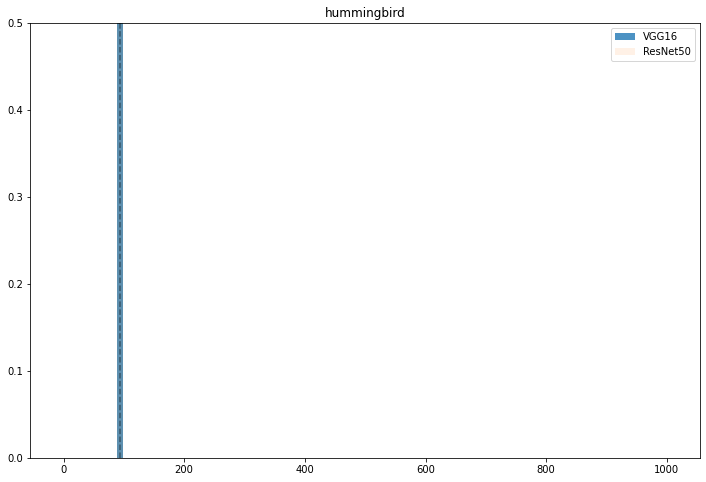

In [ ]:
preds_EfficientNetB0=[]
preds_ConvNeXtXLarge=[]
preds_MobileNet=[]
preds_VGG16=[]
preds_ResNet50=[]
from tensorflow.keras.applications.efficientnet import preprocess_input, decode_predictions
#preds_EfficientNetB0=model_predictions_general(img_path_2,EfficientNetB0,preds_EfficientNetB0)
from tensorflow.keras.applications.mobilenet import preprocess_input, decode_predictions
#preds_MobileNet=model_predictions_general(img_path_2,MobileNet,preds_MobileNet)
from tensorflow.keras.applications.vgg16 import preprocess_input,decode_predictions
preds_VGG16=model_predictions_general(img_path_2,VGG16,preds_VGG16)
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
preds_ResNet50=model_predictions_general(img_path_2,ResNet50,preds_ResNet50)
global_preds=[preds_EfficientNetB0,preds_MobileNet, preds_VGG16, preds_ResNet50]
label = img_label(img_path_2)
numbers=np.linspace(0,999,1000)
plt.figure(figsize=(12,8))
plt.axvline(labels_array.index(label), color='black', linestyle='--', alpha=0.4)
#plt.bar(numbers,preds_EfficientNetB0, label='EfficientNetB0')
#plt.bar(numbers,preds_MobileNet, label='MobileNet')
plt.bar(numbers,preds_VGG16, label='VGG16', alpha=0.8,  width=10)
plt.bar(numbers,preds_ResNet50, label='ResNet50', alpha=0.1, width=10)
plt.legend()
plt.ylim(0,0.5)
plt.title(label)
plt.show()

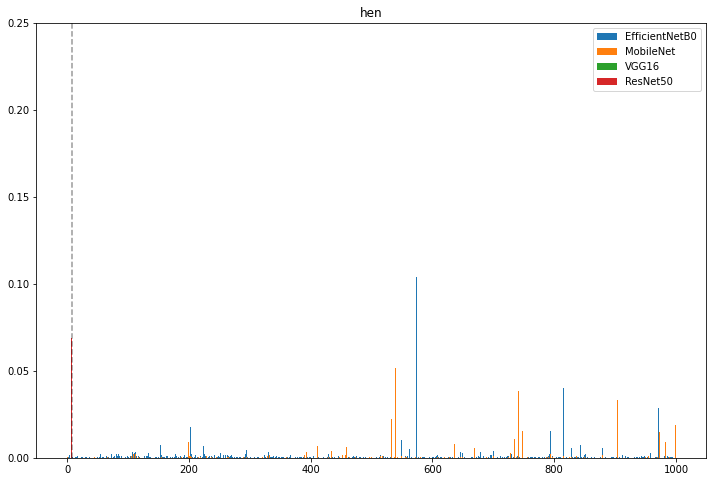

In [ ]:
_, _= global_predictor('/content/imagenet100/train.X2/n01514859/n01514859_10021.JPEG')

#**Pytorch**

In [ ]:
from torchvision.io import read_image
from torchvision.models import resnet50, ResNet50_Weights
from torchvision.models import vit_h_14, ViT_H_14_Weights
import numpy as np
import matplotlib.pyplot as plt


# Initialize model with the best available weights
weights = ResNet50_Weights.DEFAULT
resnet50 = resnet50(weights=weights)
resnet50.eval()

weights2 = ViT_H_14_Weights.DEFAULT
vit_h_14 = vit_h_14(weights=weights2)
vit_h_14.eval()

# Initialize the inference transforms
preprocess = weights.transforms()
preprocess2 = weights2.transforms()


In [ ]:
#img = read_image("/content/imagenet100/train.X2/n01514859/n01514859_10021.JPEG")
img = read_image('/content/imagenet100/train.X1/n01818515/n01818515_43525.JPEG')
#img = read_image('/content/imagenet100/train.X1/n01833805/n01833805_10010.JPEG')
#img = read_image('/content/imagenet100/train.X4/n01491361/n01491361_1000.JPEG')
#img = read_image('/content/imagenet100/val.X/n01443537/ILSVRC2012_val_00000236.JPEG')


# Apply inference preprocessing transforms
batch = preprocess(img).unsqueeze(0)
batch = preprocess2(img).unsqueeze(0)

# Use the model and print the predicted category
prediction_resnet50 = resnet50(batch).squeeze(0).softmax(0)
class_id = prediction_resnet50.argmax().item()
score = prediction_resnet50[class_id].item()
category_name = weights.meta["categories"][class_id]
print(f"{category_name}: {100 * score:.1f}%")

prediction_vit_h_14 = vit_h_14(batch).squeeze(0).softmax(0)
class_id2 = prediction_vit_h_14.argmax().item()
score2 = prediction_vit_h_14[class_id2].item()
category_name2 = weights2.meta["categories"][class_id2]
print(f"{category_name2}: {100 * score2:.1f}%")

#Preplot
prediction_resnet50 = prediction_resnet50.detach().numpy()
prediction_vit_h_14 = prediction_vit_h_14.detach().numpy()

#Plot:
numbers=np.linspace(0,999,1000)
plt.figure(figsize=(12,8))
#plt.axvline(labels_array.index(category_name), color='black', linestyle='--', alpha=0.4)
plt.plot(numbers,prediction_resnet50, label='ResNet50')
plt.plot(numbers,prediction_vit_h_14, label='vit_h_14')
plt.legend()
plt.title(category_name2)
plt.show()

NameError: ignored